# What is cooking introduction in R
Adopted from:
https://www.kaggle.com/amhchiu/whats-cooking/bag-of-ingredients-in-r/code


In [7]:
install.packages("rpart.plot", repos="http://cran.rstudio.com/")
install.packages("RJSONIO", repos="http://cran.rstudio.com/")
install.packages("dplyr", repos="http://cran.rstudio.com/")
install.packages("tm", repos="http://cran.rstudio.com/")
install.packages("caret", repos="http://cran.rstudio.com/")
install.packages("ggplot2", repos="http://cran.rstudio.com/")
install.packages('randomForest', repos="http://cran.rstudio.com/")

In [8]:
library(randomForest)
library(RJSONIO)
library(dplyr)
library(ggplot2)
library(tm) # For NLP; creating bag-of-words
library(caret)
library(rpart)
library(rpart.plot)

In [9]:
test <- fromJSON("test.json", flatten = TRUE)
train <- fromJSON("train.json", flatten = TRUE)


ERROR: Error in file(con, "r"): cannot open the connection


In [10]:
install.packages('jsonlite', repos="http://cran.rstudio.com/")


ERROR: Error in if (is.waive(data) || empty(data)) return(cbind(data, PANEL = integer(0))): missing value where TRUE/FALSE needed


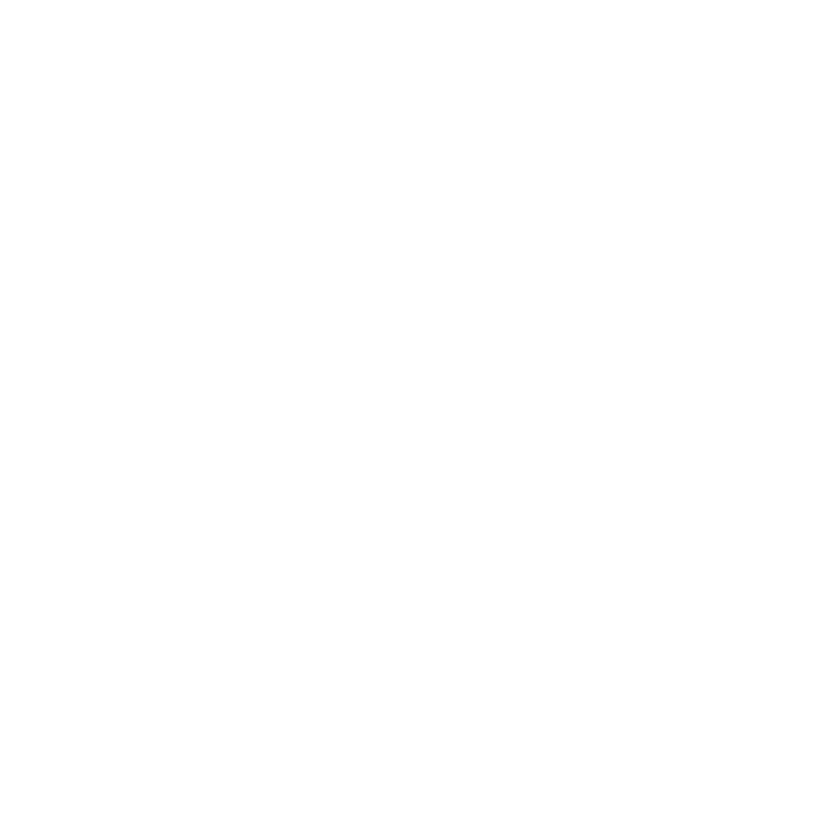

In [11]:
#Now let's take a look at the data. 
ggplot(data = train, aes(x = cuisine)) + 
  geom_histogram() +
  labs(title = "Cuisines", x = "Cuisine", y = "Number of Recipes")

In [12]:
#Wow, that graph seemed interesting, but I can't read it.  Let's instead save it to a file. Much better.
#First we assign the chart to an object. 
ggoutput<-ggplot(data = train, aes(x = cuisine)) + 
    geom_histogram() +
    labs(title = "Cuisines", x = "Cuisine", y = "Number of Recipes")

#This saves it to a file
ggsave(ggoutput, file="ggoutput.pdf", scale=2)

Saving 14 x 14 in image


ERROR: Error in if (is.waive(data) || empty(data)) return(cbind(data, PANEL = integer(0))): missing value where TRUE/FALSE needed


In [13]:
#We also know how to aggregate to see this. 
table(train$cuisine)


ERROR: Error in train$cuisine: object of type 'closure' is not subsettable


In [14]:
#Let's create the Niave Model based on those results. 
test$cuisine ="italian"

ERROR: Error in test$cuisine = "italian": object 'test' not found


In [15]:
#Create Dataframe For Submission
submission<-test[,c('id','cuisine')]

#Naive Model (This is our benchmark. 0.19268 Accuracy and 693 place)  Boom. we just beat 17 people. 
write.csv(submission, "submission.csv", row.names=FALSE)



ERROR: Error in eval(expr, envir, enclos): object 'test' not found


In [16]:
#Now let's start the process of creating a corpus
MyCorpus <- Corpus(VectorSource(train$ingredients))
MyCorpus2 <- Corpus(VectorSource(test$ingredients))


ERROR: Error in train$ingredients: object of type 'closure' is not subsettable


In [17]:
#Observe the corpus before and after this. 
MyCorpus <- tm_map(MyCorpus, stemDocument, lazy=TRUE)
MyCorpus2 <- tm_map(MyCorpus2, stemDocument, lazy=TRUE)

ERROR: Error in tm_map(MyCorpus, stemDocument, lazy = TRUE): object 'MyCorpus' not found


In [18]:
#This creates a Document Term Matrix. 
ingredientsDTM <- DocumentTermMatrix(MyCorpus)
ingredientsDTM2 <- DocumentTermMatrix(MyCorpus2)

ERROR: Error in TermDocumentMatrix(x, control): object 'MyCorpus' not found


In [19]:
#This removes most of the terms.  We are just going to start with a few. 
sparse <- removeSparseTerms(ingredientsDTM, 0.995)
sparse2 <- removeSparseTerms(ingredientsDTM2, 0.995)

ERROR: Error in inherits(x, c("DocumentTermMatrix", "TermDocumentMatrix")): object 'ingredientsDTM' not found


In [20]:
#This goes through the process of changing out term document matrix to a data frame we can use for marketing
ingredientsDTM <- as.data.frame(as.matrix(sparse))
ingredientsDTM2 <- as.data.frame(as.matrix(sparse2))

ERROR: Error in as.matrix(sparse): object 'sparse' not found


In [21]:
#We have a problem though....We only want to use terms 
trainColumns<-names(ingredientsDTM)
testColumns<-names(ingredientsDTM2)

intersect<-intersect(trainColumns,testColumns)

ERROR: Error in eval(expr, envir, enclos): object 'ingredientsDTM' not found


In [22]:
#This removes about 10 columns that aren't in both. 
ingredientsDTM<- ingredientsDTM[,c(intersect)]
ingredientsDTM2<- ingredientsDTM2[,c(intersect)]

ERROR: Error in eval(expr, envir, enclos): object 'ingredientsDTM' not found


In [23]:
ingredientsDTM$cuisine <- as.factor(train$cuisine)

ERROR: Error in train$cuisine: object of type 'closure' is not subsettable


In [24]:
set.seed(9347)
cartModelFit <- rpart(cuisine ~ ., data = ingredientsDTM, method = "class")
prp(cartModelFit)

ERROR: Error in is.data.frame(data): object 'ingredientsDTM' not found


In [25]:
#This generates the class prediction.  
cartPredict<-predict(cartModelFit, newdata = ingredientsDTM2, type = "class")

ERROR: Error in predict(cartModelFit, newdata = ingredientsDTM2, type = "class"): object 'cartModelFit' not found


In [26]:
#This creates our final submission data frame. 
submit <- data.frame(id = test$id, cuisine = cartPredict)

#Tree  Now the accuracy is 0.40115.  We have improved!
write.csv(submit, file = "myfirstdtree.csv", row.names = FALSE)


ERROR: Error in data.frame(id = test$id, cuisine = cartPredict): object 'test' not found


In [27]:
#It seems that random forests package doesn't work with "-" in the column name. You can try yourself.
names(ingredientsDTM) <- gsub("-", "", names(ingredientsDTM))
names(ingredientsDTM2) <- gsub("-", "", names(ingredientsDTM2))

ERROR: Error in gsub("-", "", names(ingredientsDTM)): object 'ingredientsDTM' not found


In [28]:
#Boom with 1 tree we improved to an accuracy of  0.54354
forestmodel <- randomForest(cuisine ~ ., data=ingredientsDTM, importance=TRUE, ntree=1)
forestPredict<-predict(forestmodel, newdata = ingredientsDTM2, type = "class")



ERROR: Error in eval(expr, envir, enclos): object 'ingredientsDTM' not found


In [29]:
#Create Submssion Data Frame
submit3 <- data.frame(id = test$id, cuisine = forestPredict)
write.csv(submit3, file = "3_forest.csv", row.names = FALSE)

ERROR: Error in data.frame(id = test$id, cuisine = forestPredict): object 'test' not found


In [30]:
#Double boom with 100 trees we move up even further to  0.74387
forestmodel <- randomForest(cuisine ~ ., data=ingredientsDTM, importance=TRUE, ntree=100)
forestPredict<-predict(forestmodel, newdata = ingredientsDTM2, type = "class")

ERROR: Error in eval(expr, envir, enclos): object 'ingredientsDTM' not found


In [31]:
#Create Submssion Data Frame
submit4 <- data.frame(id = test$id, cuisine = forestPredict)
write.csv(submit4, file = "4_forest.csv", row.names = FALSE)


ERROR: Error in data.frame(id = test$id, cuisine = forestPredict): object 'test' not found


In [32]:
#Where to go next: 
#Let's try some more feature engineerning. 
ingredientsDTM$ingredients_count  <- rowSums(ingredientsDTM)

#Another strategy could be to create a corpus from both the training and the test set. 
MyCorpus3  <- c(Corpus(VectorSource(train$ingredients)), Corpus(VectorSource(test$ingredients)))

ERROR: Error in is.data.frame(x): object 'ingredientsDTM' not found
